In [3]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import uniform, randint

from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


import xgboost as xgb

from google.colab import drive
import warnings
warnings.filterwarnings('always')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
drive.mount('/content/drive')
#ds_hotels = pd.read_csv("./hotels_modificado_train.csv")
ds_hotels = pd.read_csv("./drive/MyDrive/datasets/hotels_modificado_train.csv")
ds_h = ds_hotels.copy() 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


# Pre procesamiento de hotels_train

In [ ]:
ds_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61596 entries, 0 to 61595
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      61596 non-null  int64  
 1   hotel                           61596 non-null  object 
 2   lead_time                       61596 non-null  int64  
 3   arrival_date_year               61596 non-null  int64  
 4   arrival_date_month              61596 non-null  object 
 5   arrival_date_week_number        61596 non-null  int64  
 6   arrival_date_day_of_month       61596 non-null  int64  
 7   stays_in_weekend_nights         61596 non-null  int64  
 8   stays_in_week_nights            61596 non-null  int64  
 9   adults                          61596 non-null  int64  
 10  children                        61596 non-null  float64
 11  babies                          61596 non-null  int64  
 12  meal                            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [5]:
def agent_a_string(value):
    return str(value)
ds_h["agent"] = ds_h["agent"].apply(agent_a_string)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
ds = ds_h.drop(["id", "Unnamed: 0"], axis="columns", inplace=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61596 entries, 0 to 61595
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61596 non-null  object 
 1   lead_time                       61596 non-null  int64  
 2   arrival_date_year               61596 non-null  int64  
 3   arrival_date_month              61596 non-null  object 
 4   arrival_date_week_number        61596 non-null  int64  
 5   arrival_date_day_of_month       61596 non-null  int64  
 6   stays_in_weekend_nights         61596 non-null  int64  
 7   stays_in_week_nights            61596 non-null  int64  
 8   adults                          61596 non-null  int64  
 9   children                        61596 non-null  float64
 10  babies                          61596 non-null  int64  
 11  meal                            61596 non-null  object 
 12  country                         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [7]:
#One hot encoding para variables categoricas
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", 
"customer_type"]
ds = pd.get_dummies(ds, columns=var_cual, drop_first=True)
ds.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLT,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NGA,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,agent_10.0,agent_103.0,agent_104.0,agent_105.0,agent_106.0,agent_107.0,agent_11.0,agent_110.0,agent_111.0,agent_112.0,agent_114.0,agent_115.0,agent_118.0,agent_119.0,agent_12.0,agent_121.0,agent_126.0,agent_127.0,agent_128.0,agent_129.0,agent_13.0,agent_132.0,agent_133.0,agent_134.0,agent_138.0,agent_139.0,agent_14.0,agent_141.0,agent_142.0,agent_143.0,agent_144.0,agent_146.0,agent_147.0,agent_148.0,agent_149.0,agent_15.0,agent_151.0,agent_152.0,agent_153.0,agent_154.0,agent_155.0,agent_156.0,agent_157.0,agent_159.0,agent_16.0,agent_162.0,agent_163.0,agent_167.0,agent_168.0,agent_17.0,agent_170.0,agent_171.0,agent_173.0,agent_174.0,agent_175.0,agent_177.0,agent_179.0,agent_180.0,agent_181.0,agent_182.0,agent_183.0,agent_184.0,agent_185.0,agent_187.0,agent_19.0,agent_191.0,agent_192.0,agent_193.0,agent_195.0,agent_196.0,agent_197.0,agent_2.0,agent_20.0,agent_201.0,agent_205.0,agent

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [8]:
#Separo un set de Evaluacion
features=list(ds.columns)
ds_x=ds.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_y = ds['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(ds_x, 
                                                    ds_y, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds['is_canceled'].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Datos Entrenamiento: 49276
# Datos Prueba: 12320
% Positivos Entrenamiento: 49.923
% Positivos Prueba: 49.927


# XGBoost

XGBoost sin optimizacion de hiperparametros 

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AUC: 0.9456936931077423
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6169
           1       0.86      0.87      0.87      6151

    accuracy                           0.86     12320
   macro avg       0.87      0.86      0.86     12320
weighted avg       0.87      0.86      0.86     12320



<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

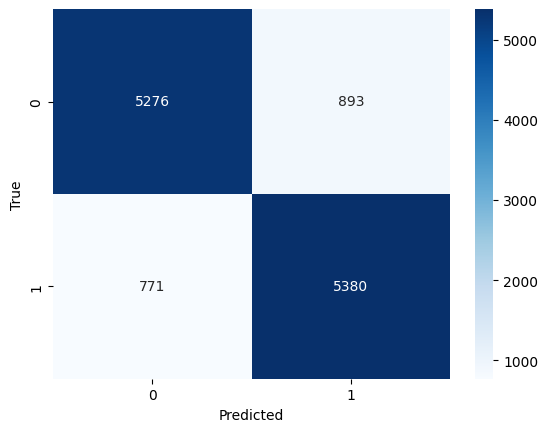

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))


In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))
print("auc: "+str(auc))

Accuracy: 0.8649350649350649
Recall: 0.87465452771907
Precision: 0.8576438705563526
f1 score: 0.8660656793303284
auc: 0.8649492447316375


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Testeo algunos posibles hiperparametros para comparar con los default

Tomo como hiperparametros para optimizar a subsample para regular el underfitting, a colsample_bytree, learning_rate y alpha para regular el overfitting y n_estimators y max_depth para probar con mayor cantidad de arboles mas menos extensos que el default(3).

In [ ]:
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.891898,0.000854,0.890323,0.000943
1,0.897177,0.001289,0.895833,0.002537
2,0.900131,0.001043,0.898507,0.002078
3,0.901234,0.000973,0.899603,0.002189
4,0.903405,0.000222,0.901753,0.001365
5,0.905628,0.001573,0.903924,0.001619
6,0.908175,0.000577,0.906544,0.000724
7,0.911246,0.002422,0.909783,0.002659


In [ ]:
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'max_depth':4},num_boost_round=8,metrics='auc')
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.848431,0.004818,0.846663,0.006368
1,0.872056,0.009065,0.870798,0.009639
2,0.886562,0.001925,0.885132,0.001902
3,0.896060,0.004217,0.895149,0.003761
4,0.906773,0.003812,0.905624,0.002916
5,0.910468,0.003599,0.909185,0.002886
6,0.913390,0.002867,0.912131,0.002560
7,0.916027,0.002252,0.914612,0.001776


In [ ]:
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'n_estimators':125},num_boost_round=8,metrics='auc')
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[21:44:35] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[21:44:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[21:44:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[21:44:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[21:44:43] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.891898,0.000854,0.890323,0.000943
1,0.900810,0.000952,0.899359,0.001741
2,0.909846,0.002784,0.908559,0.003649
3,0.916928,0.002286,0.914796,0.001593
4,0.922415,0.000796,0.920018,0.001681
5,0.926270,0.001690,0.923653,0.001403
6,0.930502,0.001556,0.927129,0.001413
7,0.933348,0.001215,0.929691,0.001220


In [ ]:
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'colsample_bytree':0.8},num_boost_round=8,metrics='auc')
results


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.847139,0.001653,0.844972,0.002967
1,0.892034,0.019823,0.890288,0.018808
2,0.914123,0.001433,0.912311,0.002070
3,0.919987,0.004133,0.918307,0.003596
4,0.924613,0.004742,0.922368,0.004027
5,0.928462,0.003274,0.925703,0.001929
6,0.931275,0.002319,0.928070,0.001396
7,0.935085,0.001477,0.931225,0.000784


In [ ]:
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'subsample':0.8},num_boost_round=8,metrics='auc')
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.891625,0.000589,0.890697,0.002003
1,0.900876,0.001411,0.899296,0.002553
2,0.908972,0.000801,0.907238,0.001415
3,0.916394,0.002199,0.914304,0.002537
4,0.920542,0.002060,0.918334,0.002586
5,0.926814,0.002596,0.924137,0.003106
6,0.930333,0.002400,0.927198,0.002774
7,0.932366,0.002441,0.928618,0.002702


Optimizacion de Hiperparametros

In [ ]:
#Parámetros a optimizar
params_grid = {'n_estimators':randint(100, 150), 'max_depth':randint(2,6), 'learning_rate':uniform(0.1,0.3), "colsample_bytree": uniform(0.7, 0.3), "alpha": uniform(0.01,0.2), "subsample": uniform(0.6, 0.4)}

#Folds
kfoldcv = StratifiedKFold(n_splits=5)
scorer_fn = make_scorer(f1_score)

#Ramdom Search CV
randomcv = RandomizedSearchCV(xgb.XGBClassifier(), params_grid, scoring=scorer_fn, random_state=42, n_iter=5, cv=kfoldcv, verbose=1, n_jobs=1, return_train_score=True)
randomcv.fit(x_train,y_train)

print (randomcv.best_score_, randomcv.best_params_)

#Mejor Modelo
gb = randomcv.best_estimator_

NameError: ignored

 {'alpha': 0.011413261043943482, 'colsample_bytree': 0.7069187275124247, 'learning_rate': 0.2574323980775167, 'max_depth': 4, 'n_estimators': 107}

{'alpha': 0.041198904067240534, 'colsample_bytree': 0.7174250836504598, 'learning_rate': 0.3598528437324805, 'max_depth': 5, 'n_estimators': 139, 'subsample': 0.8832290311184181}

In [ ]:
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

agent_248.0: 0.00044986611464992166
agent_420.0: 0.0004551826568786055
agent_497.0: 0.0004615292709786445
agent_23.0: 0.0005288253305479884
country_URY: 0.0005310354754328728
agent_103.0: 0.0005422619287855923
agent_151.0: 0.0005453769117593765
country_ARE: 0.0005632361280731857
country_AUT: 0.0005654881242662668
agent_157.0: 0.0005810769507661462
country_TJK: 0.0005826627602800727
agent_306.0: 0.0005851296009495854
agent_22.0: 0.0005892353947274387
country_SGP: 0.0006067430367693305
agent_171.0: 0.0006093741394579411
agent_96.0: 0.0006142648635432124
agent_214.0: 0.0006169707048684359
agent_384.0: 0.0006271398742683232
country_GHA: 0.0006273924373090267
agent_153.0: 0.0006494302651844919
agent_126.0: 0.0006583585636690259
agent_193.0: 0.0006591895944438875
agent_185.0: 0.0006673660827800632
agent_86.0: 0.0006815681699663401
country_GBR: 0.0006853199447505176
agent_68.0: 0.0006908384384587407
country_HND: 0.0007199227111414075
country_CYP: 0.0007207700982689857
agent_299.0: 0.000741409

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
best_params = {'alpha': 0.041198904067240534, 'colsample_bytree': 0.7174250836504598, 'learning_rate': 0.3598528437324805, 'max_depth': 5, 'n_estimators': 139, 'subsample': 0.8832290311184181}
xgb_model=xgb.XGBClassifier().set_params(**best_params)

#Entreno el arbol en todo el set
xgb_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


XGBClassifier(alpha=0.041198904067240534, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7174250836504598, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3598528437324805,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=139, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AUC: 0.9468709335613514
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6169
           1       0.86      0.87      0.87      6151

    accuracy                           0.87     12320
   macro avg       0.87      0.87      0.87     12320
weighted avg       0.87      0.87      0.87     12320



<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

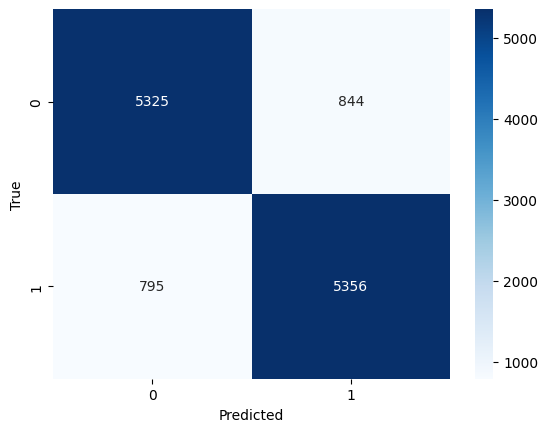

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))


In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8669642857142857
Recall: 0.8707527231344497
Precision: 0.8638709677419355
f1 score: 0.8672981944781799


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grafico del arbol mas importante del modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


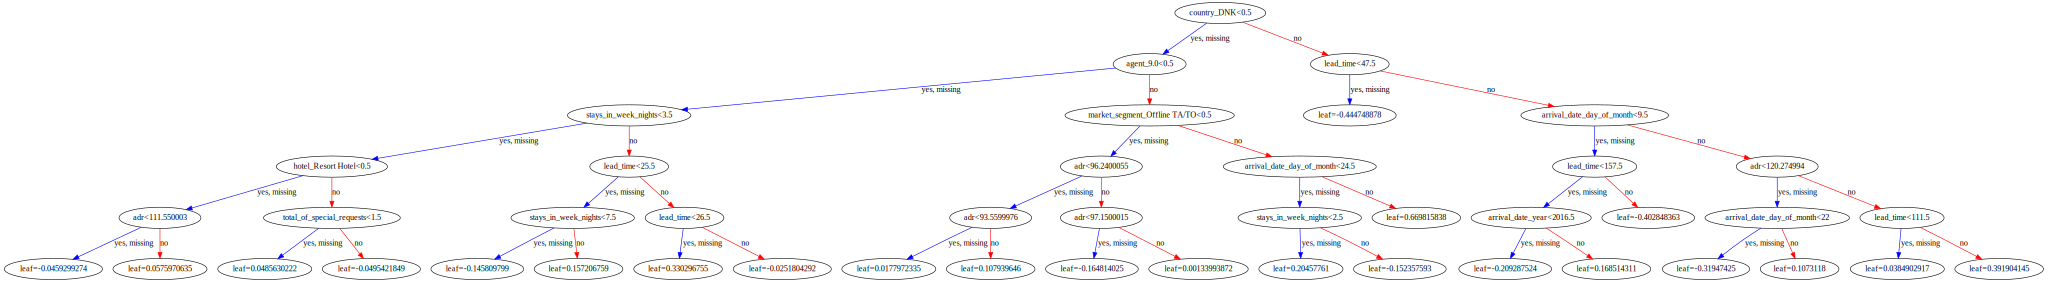

In [ ]:
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


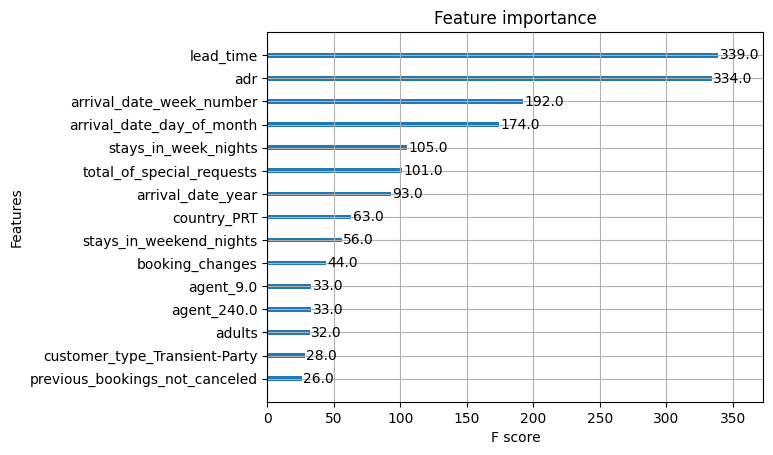

<Figure size 4000x4000 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_model,  max_num_features = 15)


# Voting

Uso los parametros optimizados de XGBoost y Decission Tree porque ya los tengo y le doy mas peso al XGBoost porque es un mejor modelo

In [10]:
#Creo clasificadores

log_clf = xgb.XGBClassifier().set_params(**best_params)
rnd_clf = RandomForestClassifier()
des_tree_clf = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15, 
                                         min_samples_leaf=10,
                                         ccp_alpha=0.01)

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', log_clf), ('rnd', rnd_clf), ('knn', des_tree_clf)], voting = 'soft', weights=[2,1,1])


#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
f1=f1_score(y_test,pred,)
precision=precision_score(y_test,pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8717532467532467
Recall: 0.8673386441229068
Precision: 0.8747335628791605
f1 score: 0.8710204081632652


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


AUC: 0.9508814993412001
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6169
           1       0.87      0.88      0.87      6151

    accuracy                           0.87     12320
   macro avg       0.87      0.87      0.87     12320
weighted avg       0.87      0.87      0.87     12320



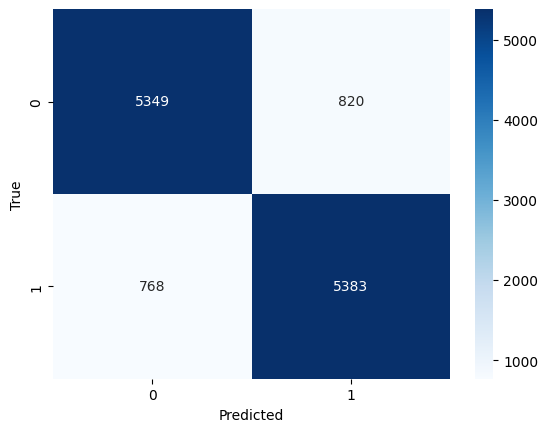

In [ ]:
#Evaluo en el set de test
pred_proba= vot_clf.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, pred_proba))

#Matriz de Confusion
pred=vot_clf.predict(x_test)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,pred))

In [ ]:


def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

df = pd.DataFrame()
df['Feature'] = x_train.columns
df['Feature Importance'] = compute_feature_importance(vot_clf, [2, 1, 1])
df.sort_values('Feature Importance', ascending=False)

In [11]:
scores = cross_val_score(vot_clf, x_train, y_train, cv=5)
scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.88088474, 0.8761035 , 0.87650939, 0.87285642, 0.88117707])

# Pre Procesamiento de Datos de hotel_train

In [ ]:
ds_hotels_test = pd.read_csv("./drive/MyDrive/datasets/hotels_test.csv")
ds_h_test = ds_hotels_test.copy()
ds_h_test.drop(columns="reservation_status_date", inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
ds_h_test.drop(columns= 'company', inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#One hot encoding para variables categoricas
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", 
"customer_type"]
ds_h_test = pd.get_dummies(ds_h_test, columns=var_cual, drop_first=True)

ds_h_test.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ALB,country_AND,country_ARE,country_ARG,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_BEL,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KHM,country_KOR,country_KWT,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MOZ,country_MWI,country_MYS,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_PRY,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,agent_2.0,agent_3.0,agent_4.0,agent_5.0,agent_6.0,agent_7.0,agent_8.0,agent_9.0,agent_10.0,agent_11.0,agent_12.0,agent_13.0,agent_14.0,agent_15.0,agent_16.0,agent_17.0,agent_19.0,agent_20.0,agent_21.0,agent_22.0,agent_23.0,agent_25.0,agent_26.0,agent_27.0,agent_28.0,agent_29.0,agent_30.0,agent_31.0,agent_32.0,agent_33.0,agent_34.0,agent_35.0,agent_36.0,agent_37.0,agent_38.0,agent_39.0,agent_40.0,agent_41.0,agent_42.0,agent_44.0,agent_45.0,agent_47.0,agent_50.0,agent_52.0,agent_53.0,agent_55.0,agent_56.0,agent_57.0,agent_58.0,agent_60.0,agent_61.0,agent_63.0,agent_64.0,agent_66.0,agent_67.0,agent_68.0,agent_69.0,agent_71.0,agent_72.0,agent_74.0,agent_75.0,agent_77.0,agent_78.0,agent_79.0,agent_81.0,agent_82.0,agent_83.0,agent_85.0,agent_86.0,agent_87.0,agent_88.0,agent_89.0,agent_91.0,agent_92.0,agent_94.0,agent_95.0,agent_96.0,agent_98.0,agent_99.0,agent_103.0,agent_104.0,agent_105.0,agent_106.0,agent_110.0,agent_111.0,agent_112.0,agent_115.0,agent_118.0,agent_119.0,agent_121.0,agent_122.0,agent_126.0,agent_127.0,agent_128.0,agent_12

In [ ]:
# Agarramos las columnas diferentes de ds
diff_cols_df2 = set(ds.columns) - set(ds_h_test.columns)

# Agrego las columnas faltantes en ds_h_test y las inicializo en false
for col in diff_cols_df2:
    ds_h_test[col] = np.False_

# Solo me quedo con las columnas de ds_h_test que esten en ds
df_test = ds_h_test[ds.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df_test.drop(["is_canceled"], axis="columns", inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-41-16018231a16c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
pipeline = Pipeline([  ('imputer', imputer)])
pipeline.fit(ds)
#ds_copiado = ds_h_test.drop(columns="id", inplace=True)
#ds_h_test = pipeline.transform(ds_h_test)

# Obtener lista de columnas de ds
cols_ds = ds.columns

# Seleccionar solo las columnas presentes en ds en ds_h_test
cols_ds_h_test = [col for col in df_test.columns if col in cols_ds]

# Aplicar pipeline solo a las columnas presentes en ambos dataframes
pipeline.fit(ds[cols_ds_h_test])
df_test[cols_ds_h_test] = pipeline.transform(df_test[cols_ds_h_test])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-42-b645a9ee074f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-42-b645a9ee074f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-42-b645a9ee

In [ ]:
y_pred_kaggle = xgb_model.predict(df_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
ds_kaggle = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_kaggle})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
ds_kaggle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [ ]:
ds_kaggle.to_csv('./drive/MyDrive/predicciones/pred_xgb.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
y_pred_kaggle = vot_clf.predict(df_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
ds_kaggle = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_kaggle})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
ds_kaggle.to_csv('./drive/MyDrive/predicciones/pred_kaggle_voting2.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


# Guardar el Arbol

In [ ]:
import joblib
filename = './xgb_model.sav'
joblib.dump(xgb_model, filename)

['./xgb_model.sav']

In [ ]:
import joblib
filename = './voting_model.sav'
joblib.dump(vot_clf, filename)

['./voting_model.sav']